In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = '/home/rohit-ubuntu18_04/bboxes/new_dataset/'
hl_dir = os.path.join(base_dir, 'leaf_healthy')
dl_dir = os.path.join(base_dir, 'leaf_diseased')
he_dir = os.path.join(base_dir, 'ear_healthy')
de_dir = os.path.join(base_dir, 'ear_diseased')

labels_file = '/home/rohit-ubuntu18_04/bboxes/labels.csv'
log_file = '/home/rohit-ubuntu18_04/bboxes/log'
ann_dict_file = '/home/rohit-ubuntu18_04/annotations_dict.csv'

In [3]:
hl_imgs = sorted(os.listdir(hl_dir))
dl_imgs = sorted(os.listdir(dl_dir))
he_imgs = sorted(os.listdir(he_dir))
de_imgs = sorted(os.listdir(de_dir))

In [4]:
print(f'****** DATASET USED FOR CLASSIFICATION(MORE THAN ONE OBJECT HAS BEEN EXTRACTED FROM A SINGLE IMAGE ******)')
print(f'number of healthy leaves {len(hl_imgs)}')
print(f'number of diseased leaves {len(dl_imgs)}')
print(f'number of healthy ears {len(he_imgs)}')
print(f'number of diseased ears {len(de_imgs)}')

****** DATASET USED FOR CLASSIFICATION(MORE THAN ONE OBJECT HAS BEEN EXTRACTED FROM A SINGLE IMAGE ******)
number of healthy leaves 235
number of diseased leaves 206
number of healthy ears 211
number of diseased ears 110


In [5]:
raw_dataset_dir = '/home/rohit-ubuntu18_04/dataset/'
raw_leaves_images_dir = os.path.join(raw_dataset_dir, 'leaves')
raw_ears_images_dir = os.path.join(raw_dataset_dir, 'ears')

no_healthy_leaves = len(os.listdir(os.path.join(raw_leaves_images_dir, 'healthy', 'hiren'))) + len(os.listdir(os.path.join(raw_leaves_images_dir, 'healthy', 'manan')))
no_diseased_leaves = len(os.listdir(os.path.join(raw_leaves_images_dir, 'diseased', 'hiren'))) + len(os.listdir(os.path.join(raw_leaves_images_dir, 'diseased', 'manan')))

no_healthy_ears = len(os.listdir(os.path.join(raw_ears_images_dir, 'healthy', 'hiren'))) + len(os.listdir(os.path.join(raw_ears_images_dir, 'healthy', 'manan')))
no_diseased_ears = len(os.listdir(os.path.join(raw_ears_images_dir, 'diseased', 'hiren'))) + len(os.listdir(os.path.join(raw_ears_images_dir, 'diseased', 'manan')))     

print(f'****** DISTRIBUTION OF RAW IMAGES FOR DETECTION ******)')
print(f'number of healthy leaves {no_healthy_leaves}')
print(f'number of diseased leaves {no_diseased_leaves}')
print(f'number of healthy ears {no_healthy_ears}')
print(f'number of diseased ears {no_diseased_ears}')

****** DISTRIBUTION OF RAW IMAGES FOR DETECTION ******)
number of healthy leaves 236
number of diseased leaves 200
number of healthy ears 208
number of diseased ears 113


In [6]:
ann_dict = {}
with open(ann_dict_file, 'r') as f:
    for line in f.readlines():
        line = line.strip().split(',')
        ann_dict[line[0]] = line[1]
#ann_dict

In [7]:
def draw_box(image, box, color, thickness=2):
    b = np.array(box).astype(int)
    cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), color, thickness, cv2.LINE_AA)

img shape is  (4128, 2322, 3)
['31', '298', '4106', '1529']


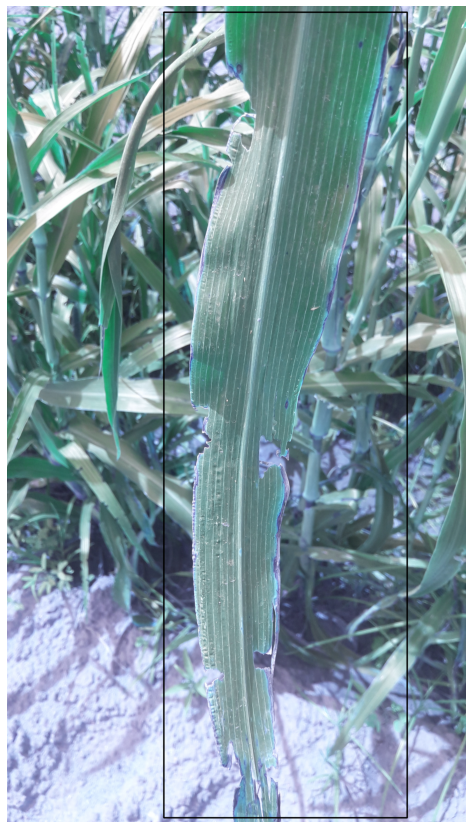

In [8]:
plt.figure(figsize=(30,15))
plt.axis('off')
ann = open(labels_file, "r")
lines = ann.readlines()

i=300
while(i<len(lines)):
    flag = 0
    img_data=lines[i].strip().split(',')
    img = cv2.imread(os.path.join(base_dir, '..', ann_dict[img_data[0]]))
    if(img.shape[0]>img.shape[1]):
        #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        flag =1
    print('img shape is ', img.shape)
    while(lines[i].strip().split(',')[0] == img_data[0]):
        next_box = lines[i].strip().split(',')
        print(next_box[2:])
        if(flag==1):
            [a,b,c,d] = next_box[2:]
            next_box[2] = int(img.shape[1])- int(d)
            next_box[3] = int(a)
            next_box[4] = int(img.shape[1])- int(b)
            next_box[5] = int(c)     
        draw_box(img, next_box[2:], 0, 5)
        i+=1
    plt.imshow(img)
    break
ann.close()

In [9]:
# #ad = open('annotations_dict.csv', 'w')
# with open(log_file, 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         pro = line.strip().split('->')
#         if(len(pro)>1 and len(pro[1])<10):   # avoid images with no mappings
#             print(pro[1])
# #             pro[0] = pro[0].replace('bajra_dataset_copy', 'dataset')
# #             print(pro[1])
# #            ad.write('{},{}\n'.format(pro[1].strip(), pro[0].strip()))
    
# #ad.close()

In [8]:
#sort data in annotations file
# ann_file = 'all_annotations.csv'

# with open(ann_file, 'r') as f:
#     contents = sorted(f.readlines())
    
# with open(ann_file, "w") as fout:
#     fout.writelines(contents)

In [11]:
# with open(labels_file) as f:
#     content = f.readlines()
#     content = [line.strip().split(',')[0] for line in content]
# print(f'total number of images - {len(set(content))}')

In [12]:
with open(ann_dict_file) as f:
    content = f.readlines()
    content = [line.strip().split(',')[1] for line in content]
    content = set(content)
print(f'total number of images - {len(content)}')

total number of images - 748


In [13]:
all_image_set = [os.path.join('../dataset/leaves', 'healthy', 'hiren',
                 f) for f in
                 os.listdir(os.path.join(raw_leaves_images_dir,
                 'healthy', 'hiren'))] \
    + [os.path.join('../dataset/leaves', 'healthy', 'manan', f)
       for f in os.listdir(os.path.join(raw_leaves_images_dir, 'healthy'
       , 'manan'))] + [os.path.join('../dataset/leaves', 'diseased',
                       'hiren', f) for f in
                       os.listdir(os.path.join(raw_leaves_images_dir,
                       'diseased', 'hiren'))] \
    + [os.path.join('../dataset/leaves', 'diseased', 'manan', f)
       for f in os.listdir(os.path.join(raw_leaves_images_dir,
       'diseased', 'manan'))] + [os.path.join('../dataset/ears',
                                 'healthy', 'hiren', f) for f in
                                 os.listdir(os.path.join(raw_ears_images_dir,
                                 'healthy', 'hiren'))] \
    + [os.path.join('../dataset/ears', 'healthy', 'manan', f) for f in
       os.listdir(os.path.join(raw_ears_images_dir, 'healthy', 'manan'
       ))] + [os.path.join('../dataset/ears', 'diseased', 'hiren', f)
              for f in os.listdir(os.path.join(raw_ears_images_dir,
              'diseased', 'hiren'))] + [os.path.join('../dataset/ears',
        'diseased', 'manan', f) for f in
        os.listdir(os.path.join(raw_ears_images_dir, 'diseased', 'manan'
        ))]

all_image_set = set(all_image_set)

In [14]:
images_without_ann = all_image_set.difference(content)
print(f'***** TOTAL RAW IMAGES - {len(all_image_set)} *****')
print(f'***** IMAGES WITHOUT ANNOTATIONS - {len(images_without_ann)} *****')
for pt in images_without_ann:
    print(pt)

# image ../dataset/leaves/healthy/hiren/20190908_102541.jpg overly dense objects
# 8 of these images have been annotated(all others than one mentioned above)

***** TOTAL RAW IMAGES - 757 *****
***** IMAGES WITHOUT ANNOTATIONS - 9 *****
../dataset/ears/healthy/hiren/20190907_134247.jpg
../dataset/ears/diseased/hiren/20190908_121320.jpg
../dataset/leaves/diseased/hiren/20190908_131607.jpg
../dataset/ears/diseased/hiren/20190908_115804.jpg
../dataset/leaves/healthy/manan/20190908_102427.jpg
../dataset/leaves/healthy/hiren/20190908_102541.jpg
../dataset/ears/diseased/manan/20190908_110308.jpg
../dataset/leaves/diseased/hiren/20190908_135425.jpg
../dataset/ears/healthy/manan/20190907_133635.jpg


In [15]:
# duplicates = set([x for x in content if content.count(x) > 1])
# duplicates